# 🛒 Tag suggestion

|   |   |
|---|---|
| Project  |    [nom du proj](#https://openclassrooms.com/fr/paths/148/projects/630/assignment)         |
| Date   |   February 2023   |
| Autor  | Ana Bernal                                                    |
| Data source | |
| Mentor | Samir Tanfous | 
| Notebook number  | _ of _                                                     |

**Description:** blabla

# Preliminaries
## Imports

In [154]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


## Graphics and options

In [153]:
sns.set_style("whitegrid")

## Data

In [136]:
path = './data/'
filename = 'QueryResults.csv'

df = pd.read_csv(path + filename)

In [137]:
df.shape

(50000, 7)

In [138]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount
0,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,<java><multithreading><jakarta-ee><ejb-3.0><ejb>,3816286,9,13503,4
1,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,<javascript><json><node.js><base64><buffer>,22515180,14,23710,3
2,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,<c><file><directory><cross-platform><common-ta...,12489,69,142856,9
3,"Link error: ""Cannot find -ltinfo"" on Ubuntu 12...",<p>I get the following link error when I'm com...,<c++><ubuntu><arm><static-libraries><ubuntu-12...,21137879,21,17090,2
4,Android In App Updates - Not able to detect th...,"<p>Some log statements are thrown when we use,...",<android><google-play><google-play-services><a...,56581300,9,5122,3


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        50000 non-null  object
 1   Body         50000 non-null  object
 2   Tags         50000 non-null  object
 3   Id           50000 non-null  int64 
 4   Score        50000 non-null  int64 
 5   ViewCount    50000 non-null  int64 
 6   AnswerCount  50000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.7+ MB


In [140]:
df['Id'].nunique()

50000

In [141]:
df.set_index('Id', inplace=True)

In [142]:
df.head(3)

,Title,Body,Tags,Score,ViewCount,AnswerCount
Id,,,,,,
3816286,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,<java><multithreading><jakarta-ee><ejb-3.0><ejb>,9,13503,4
22515180,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,<javascript><json><node.js><base64><buffer>,14,23710,3
12489,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,<c><file><directory><cross-platform><common-ta...,69,142856,9


# Cleaning Tags column, counting tags

In [143]:
def simple_tokenize_tags(tag):
    '''
    Returns a list with more readable original 
    tags from StackOverflow. 

    Parameters:
        - tag: str

    ----------------------------------------------------------
    Example:
    tag = '<java><multithreading><jakarta-ee><ejb-3.0><ejb>'

    simple_tokenize_tags(tag) returns the list
    ['java', 'multithreading', 'jakarta-ee', 'ejb-3.0', 'ejb']
    ----------------------------------------------------------

    '''
    return tag.replace('><', ' ')[1:-1].split()

# Defining tags set

We define a tag set to work with. We would like to keep a limited number of the most popular tags.

In [144]:
df.head(3)

,Title,Body,Tags,Score,ViewCount,AnswerCount
Id,,,,,,
3816286,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,<java><multithreading><jakarta-ee><ejb-3.0><ejb>,9,13503,4
22515180,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,<javascript><json><node.js><base64><buffer>,14,23710,3
12489,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,<c><file><directory><cross-platform><common-ta...,69,142856,9


In [145]:
def clean_tags_column(df, old_tags_col):
    '''
    Adds a column to df with the clean tag form (as list)
    of the tags string in column old_tags_col.
    Removes the old tags column

    Parameters:
        - df: pandas.DataFrame
        - old_tags_col: str
            the label of the column containing string with tags.
    '''
    df['clean_Tags'] = df[old_tags_col].apply(lambda txt:simple_tokenize_tags(txt))
    df.drop(columns=old_tags_col, inplace=True)
    df.rename(columns={'clean_Tags' : 'Tags'}, inplace=True)

In [146]:
# Adding a column of clean_Tags which is a list of tags
clean_tags_column(df, 'Tags')

In [147]:
df.head(3)

,Title,Body,Score,ViewCount,AnswerCount,Tags
Id,,,,,,
3816286,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,9,13503,4,"[java, multithreading, jakarta-ee, ejb-3.0, ejb]"
22515180,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,14,23710,3,"[javascript, json, node.js, base64, buffer]"
12489,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,69,142856,9,"[c, file, directory, cross-platform, common-ta..."


We study some statistics in the whole set of tags to understand.

In [149]:
# Creating the set of all tags appearing in the sample of
# size 50 000
all_tags = set()

for tags in df['Tags']:
    all_tags = all_tags.union(set(tags))

In [150]:
# Different tags as a list
all_tags = list(all_tags)

# Counting questions per tag
all_tags_count = dict(zip(all_tags,np.zeros(len(all_tags))))

for tags in df['Tags']:
    for tag in tags:
        all_tags_count[tag] += 1

# Array counting # of questions per tag
tags_count = np.array(list(all_tags_count.values()))

print(f'There are {len(all_tags)} different tags.')
print(f'The mean of # of questions per tag is: {np.mean(tags_count)}')
print(f'The minimum # of questions per tag is: {np.min(tags_count)} (by constr.)')
print(f'The max # of questions per tag is: {np.max(tags_count)}.')
print(f'25% of tags appear in {np.quantile(tags_count, 0.25)} question.')
print(f'50% of tags appear in {np.quantile(tags_count, 0.5)} questions or less.')
print(f'75% of tags appear in {np.quantile(tags_count, 0.75)} questions or less.')


There are 18409 different tags.
The mean of # of questions per tag is: 13.58042261937096
The minimum # of questions per tag is: 1.0 (by constr.)
The max # of questions per tag is: 6226.0.
25% of tags appear in 1.0 question.
50% of tags appear in 2.0 questions or less.
75% of tags appear in 6.0 questions or less.


We now choose the more popular tags

In [249]:
# Fixing a minimal number of questions for considering
# a tag "popular"
numb_quest = 1900
popular_tags = { key:value for (key,value) in all_tags_count.items() if value >numb_quest}

# Sorting popular tags decreasingly
popular_tags = {k: v for k, v in sorted(popular_tags.items(), key=lambda item: item[1], reverse=True)}

print(f'The total # of popular tags is {len(popular_tags)}')
print(f'(appearing in more than {numb_quest} questions)')
print('-'*35)
print('Tag \t\t # of quest')
print('-'*35)
for (key,value) in popular_tags.items():
    print(f'{key:>10} \t {value}')


The total # of popular tags is 10
(appearing in more than 1900 questions)
-----------------------------------
Tag 		 # of quest
-----------------------------------
        c# 	 6226.0
      java 	 5880.0
javascript 	 4920.0
    python 	 4747.0
       c++ 	 3904.0
       ios 	 3449.0
   android 	 3223.0
      .net 	 3164.0
      html 	 2197.0
       php 	 2050.0


In [189]:
def plot_numb_popular_tags(popular_tags,n):
        '''
        Bar plot illustrating the number of questions
        per each popular tag, for n the most popular tags.

        Parameters:
                - popular_tags : dict
                        keys: the labels of popular tags
                        values: number of questions tagged with tag.
                - n : int
        '''
        
        fig, ax = plt.subplots()
        ax.barh(width=list(popular_tags.values())[:n],
                y=range(n)[::-1],
                color='blueviolet',
                alpha=0.7,
                tick_label=list(popular_tags.keys())[:n]
                )
        plt.title(f'Most popular {n} tags', fontsize=13)
        plt.xlabel('# of questions containing tag')
        ax.grid(axis='y')

        plt.show()


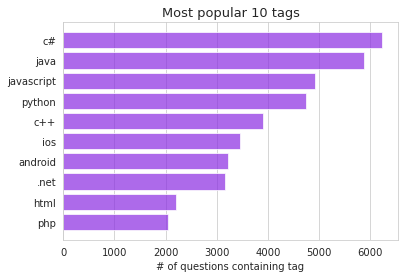

In [250]:
# Plotting the 10 most popular tags
plot_numb_popular_tags(popular_tags, 10)

## Mini-example

In [191]:
df_ex = df.head(3)

In [192]:
df_ex

,Title,Body,Score,ViewCount,AnswerCount,Tags
Id,,,,,,
3816286,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,9,13503,4,"[java, multithreading, jakarta-ee, ejb-3.0, ejb]"
22515180,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,14,23710,3,"[javascript, json, node.js, base64, buffer]"
12489,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,69,142856,9,"[c, file, directory, cross-platform, common-ta..."


In [193]:
for tags in df_ex['Tags']:
    print(tags)

['java', 'multithreading', 'jakarta-ee', 'ejb-3.0', 'ejb']
['javascript', 'json', 'node.js', 'base64', 'buffer']
['c', 'file', 'directory', 'cross-platform', 'common-tasks']


In [198]:
my_list = ['java', 'ejb', 'javascript']

In [201]:
df_ex.Tags.explode()

Id
3816286               java
3816286     multithreading
3816286         jakarta-ee
3816286            ejb-3.0
3816286                ejb
22515180        javascript
22515180              json
22515180           node.js
22515180            base64
22515180            buffer
12489                    c
12489                 file
12489            directory
12489       cross-platform
12489         common-tasks
Name: Tags, dtype: object

In [203]:
df_ex.Tags.explode().isin(my_list)

Id
3816286      True
3816286     False
3816286     False
3816286     False
3816286      True
22515180     True
22515180    False
22515180    False
22515180    False
22515180    False
12489       False
12489       False
12489       False
12489       False
12489       False
Name: Tags, dtype: bool

In [233]:
df_ex.Tags.explode()[df_ex.Tags.explode().isin(my_list)]

Id
3816286           java
3816286            ejb
22515180    javascript
Name: Tags, dtype: object

In [234]:
my_series = df_ex.Tags.explode()[df_ex.Tags.explode().isin(my_list)]
my_series = my_series.groupby(by=my_series.index).apply(list)

In [235]:
my_series

Id
3816286      [java, ejb]
22515180    [javascript]
Name: Tags, dtype: object

In [236]:
pd.merge(left=df_ex, right=my_series, how='right', left_index=True, right_index=True, suffixes=('_original',None))

,Title,Body,Score,ViewCount,AnswerCount,Tags_original,Tags
Id,,,,,,,
3816286,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,9,13503,4,"[java, multithreading, jakarta-ee, ejb-3.0, ejb]","[java, ejb]"
22515180,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,14,23710,3,"[javascript, json, node.js, base64, buffer]",[javascript]


In [237]:
def filter_popular_tags(df,tags,pop_tags):
    '''
    Returns a dataframe with filtered tags:
    it keeps only tags in the list pop_tags and
    removes the rest of the tags. Removes rows without
    popular tags.

    Parameters:
        - df: pd.DataFrame
        - pop_tags: list of str
            list of popular tags to keep.
        - tags: str
            label of the tags column in df.
    '''
    # Exploding series of tags as rows (preserves the index)
    tags_series = df[tags].explode()

    # Boolean of preceding series: True if tag is popular
    is_pop_tag = tags_series.isin(pop_tags)

    # Series of tags for which True
    pop_tags_series = tags_series[is_pop_tag]

    # Groupby of this series to go back to a list of tags
    pop_tags_series = pop_tags_series.groupby(by=pop_tags_series.index).apply(list)

    # Merge with dataframe to keep only popular tags
    pop_tags_df = pd.merge(left=df, 
                           right=pop_tags_series, 
                           how='right', 
                           left_index=True, 
                           right_index=True, 
                           suffixes=('_old',None))
    pop_tags_df.drop(columns=[tags+'_old'], inplace=True)

    return pop_tags_df

In [241]:
# Testing function
filter_popular_tags(df_ex,'Tags',my_list)

,Title,Body,Score,ViewCount,AnswerCount,Tags
Id,,,,,,
3816286,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,9,13503,4,"[java, ejb]"
22515180,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,14,23710,3,[javascript]


We now filter our dataset to keep only popular tags

In [251]:
print(f'Dataset shape before filter : {df.shape}')

# Filtering popular tags
popular_tags = list(popular_tags.keys())
df = filter_popular_tags(df,'Tags',popular_tags)

print(f'Dataset shape after filter : {df.shape}')

Dataset shape before filter :(50000, 6)
Dataset shape after filter :(33729, 6)


# Processing title and body text

In [252]:
import spacy



In [253]:
from bs4 import BeautifulSoup

In [254]:
def remove_code(text):
    """
    Removes "<code> some text </code>" from a text.

    Parameters
        - text : str
    """
    soup = BeautifulSoup(text,'lxml')
    code_to_remove = soup.findAll('code')
    for code in code_to_remove:
        code.replace_with(' ')
    return str(soup)

In [317]:
import spacy
from spacy.symbols import ORTH

We now add stopwords to the default english tokenizer stopword set. Our set of stopwords can be find in this [github repository](#https://github.com/Alir3z4/stop-words/blob/master/english.txt).

In [309]:
# Importing stopwords
with open('./stopwords/stopwords.txt') as file:
    my_stopwords = {line.rstrip() for line in file}

# print # of stopwords
print(f'The default spacy stopwords set contains {len(nlp.Defaults.stop_words)} stopwords.')
print(f'This file contains {len(my_stopwords)} stopwords.')
print('The first 10 stopwords are:')
print(list(my_stopwords)[:10])


The default spacy stopwords set contains 326 stopwords.
This file contains 1298 stopwords.
The first 10 stopwords are:
['obtained', 'dear', 'dont', 'yourselves', 'that', 'open', 'will', 'et-al', 'doesnt', 'affects']


In [313]:
# Instantiating language model, english
nlp = spacy.load("en_core_web_sm")

# Adding my_stopwords to spacy stopwords
nlp.Defaults.stop_words = nlp.Defaults.stop_words.union(my_stopwords)

# Checking new size of stopwords
print(f'we use {len(nlp.Defaults.stop_words)} in total.')

we use 1317 in total


In [316]:
def clean(text,tokenize,strict, **kwargs):
    """
    Returns a dictionnary with keys 'text' or 'tokens', where
    'tokens' corresponds tothe list of lemmatized tokens from
    the string text. Ommiting stopwords and punctuation, and the text is
    the joint text.

    Parameters:
        - text: str
        - tokenize: bool
            If True returns list of tokens, if False returns string.
        - strict: bool
            If true only keeps nouns
    """


    # Removing <code>some code</code>
    clean_txt = remove_code(text)

    # Removing HTML tags
    soup = BeautifulSoup(clean_txt, features='html.parser')
    clean_txt = soup.get_text()

    # Removing new line character: \n
    clean_txt = clean_txt.replace('\n', ' ')

    # Removing unicode characters
    clean_txt = clean_txt.encode("ascii", "ignore").decode()
    
    # Removing digits
    clean_txt = ''.join(char for char in clean_txt if not char.isdigit())

    # Replacing 'c ++' and 'c #' for 'c++' and 'c#'
    clean_txt = clean_txt.replace('c ++', 'c++')
    clean_txt = clean_txt.replace('c #', 'c#')

    # Adding special case rule
    special_case = [{ORTH: "c#"}] 
    nlp.tokenizer.add_special_case("c#", special_case)
    
    # Tokenize with spacy
    doc = nlp(clean_txt)

    # Tokenize properties
    if strict == True:
        tokens = [token.lemma_.lower() for token in doc
                    if token.pos_ in ['NOUN', 'PROPN'] and
                        (not (token.is_stop or 
                              token.is_punct or
                              token.is_space
                              )
                        )
                 ]    
    else:
        tokens = [token.lemma_.lower() for token in doc
                    if not (token.is_stop or 
                            token.is_punct or
                            token.is_space
                            )
                 ]

    clean_txt = ' '.join(tokens)
    
    # Ask if return text or tokens
    if tokenize == True:
        result = tokens
    else:
        result = clean_txt

    # Option for list of entities in output
    if 'ent' in kwargs:
        result = {'output':result, 'ents': doc.ents}

    return result

In [318]:
clean("Hi i'm currently studying c++, c#, sometimes c # and i love .net", tokenize=False, strict=False)

'study c++ c# c# love .net'

Let us test this function with two examples:

**Example 1:**

In [88]:
# Text for example
text_ex = df.loc[37,'Body']
text_ex

"<p>I've noticed that a few Wordpress blogs have query statistics present in their footer that simply state the number of queries and the total time required to process them for the particular page, reading something like:</p>\n\n<blockquote>\n  <p>23 queries. 0.448 seconds</p>\n</blockquote>\n\n<p>I was wondering how this is accomplished.  Is it through the use of a particular Wordpress plug-in or perhaps from using some particular php function in the page's code?</p>\n"

In [77]:
clean(text_ex, tokenize=False, strict=False)

'notice wordpress blog query statistic present footer simply state number total time require process particular page read like second wonder accomplish use plug php function code'

In [78]:
print(clean(text_ex, tokenize=True, strict=False))

{'notice': 'VERB', 'wordpress': 'ADJ', 'blog': 'NOUN', 'query': 'NOUN', 'statistic': 'NOUN', 'present': 'ADJ', 'footer': 'NOUN', 'simply': 'ADV', 'state': 'VERB', 'number': 'NOUN', 'total': 'ADJ', 'time': 'NOUN', 'require': 'VERB', 'process': 'VERB', 'particular': 'ADJ', 'page': 'NOUN', 'read': 'VERB', 'like': 'ADP', 'second': 'NOUN', 'wonder': 'VERB', 'accomplish': 'VERB', 'use': 'NOUN', 'plug': 'NOUN', 'php': 'NOUN', 'function': 'NOUN', 'code': 'NOUN'}


Tokens:

In [79]:
clean(text_ex, tokenize=True, strict=False).keys()

dict_keys(['notice', 'wordpress', 'blog', 'query', 'statistic', 'present', 'footer', 'simply', 'state', 'number', 'total', 'time', 'require', 'process', 'particular', 'page', 'read', 'like', 'second', 'wonder', 'accomplish', 'use', 'plug', 'php', 'function', 'code'])

Using the `strict=True` condition

In [84]:
clean(text_ex, tokenize=False, strict=True)

'blog query statistic footer number time page second use plug php function code'

In [86]:
print(clean(text_ex, tokenize=True, strict=True))

{'blog': 'NOUN', 'query': 'NOUN', 'statistic': 'NOUN', 'footer': 'NOUN', 'number': 'NOUN', 'time': 'NOUN', 'page': 'NOUN', 'second': 'NOUN', 'use': 'NOUN', 'plug': 'NOUN', 'php': 'NOUN', 'function': 'NOUN', 'code': 'NOUN'}


In [87]:
clean(text_ex, tokenize=True, strict=True).keys()

dict_keys(['blog', 'query', 'statistic', 'footer', 'number', 'time', 'page', 'second', 'use', 'plug', 'php', 'function', 'code'])

**Example 2:**

In [89]:
# Sample text
sample_text = df.loc[10787,'Body']
sample_text

'<p>I\'m learning Scala with the aim of writing agent based simulations using actor concurrency.  I currently know very little about OpenCL, and before I dive in can anyone tell me if it is likely to be appropriate/compatible with agent based simulations?  </p>\n\n<p>If so, then <a href="http://ochafik.free.fr/blog/?p=207" rel="nofollow noreferrer">ScalaCL</a> looks very attractive.</p>\n'

In [93]:
clean(sample_text, tokenize=False, strict=False)

'learn scala aim write agent base simulation actor concurrency currently know little opencl dive tell likely appropriate compatible scalacl look attractive'

In [94]:
print(clean(sample_text, tokenize=True, strict=False))

{'learn': 'VERB', 'scala': 'PROPN', 'aim': 'NOUN', 'write': 'VERB', 'agent': 'NOUN', 'base': 'VERB', 'simulation': 'NOUN', 'actor': 'NOUN', 'concurrency': 'NOUN', 'currently': 'ADV', 'know': 'VERB', 'little': 'ADJ', 'opencl': 'PROPN', 'dive': 'VERB', 'tell': 'VERB', 'likely': 'ADJ', 'appropriate': 'ADJ', 'compatible': 'ADJ', 'scalacl': 'NOUN', 'look': 'VERB', 'attractive': 'ADJ'}


Tokens:

In [95]:
clean(sample_text, tokenize=True, strict=False).keys()

dict_keys(['learn', 'scala', 'aim', 'write', 'agent', 'base', 'simulation', 'actor', 'concurrency', 'currently', 'know', 'little', 'opencl', 'dive', 'tell', 'likely', 'appropriate', 'compatible', 'scalacl', 'look', 'attractive'])

Using the `strict=True` condition

In [96]:
clean(sample_text, tokenize=False, strict=True)

'scala aim agent simulation actor concurrency opencl scalacl'

In [97]:
print(clean(sample_text, tokenize=True, strict=True))

{'scala': 'PROPN', 'aim': 'NOUN', 'agent': 'NOUN', 'simulation': 'NOUN', 'actor': 'NOUN', 'concurrency': 'NOUN', 'opencl': 'PROPN', 'scalacl': 'NOUN'}


In [98]:
clean(sample_text, tokenize=True, strict=True).keys()

dict_keys(['scala', 'aim', 'agent', 'simulation', 'actor', 'concurrency', 'opencl', 'scalacl'])

Entities: (NER)

In [92]:
clean(sample_text, tokenize=True, ent=True, strict=False)['ents']

(Scala,)

**Example 3** An example with code on the body

In [324]:
sample_text = df.loc[37242063, 'Body']
sample_text

'<p>I\'m using Odoo 8 version.</p>\n\n<p>I have created a new model called <em>enquiry_customer_date</em></p>\n\n<p>In that model, I have set following four fields. </p>\n\n<ul>\n<li>partner_id (many2one), </li>\n<li>enquiry_date (date),</li>\n<li>file_name (char) and</li>\n<li>excel_file (binary)</li>\n</ul>\n\n<p>I have given mention model one2many relationship with <em>res.partner</em> model</p>\n\n<p>I have used below code for display records.</p>\n\n<pre><code>&lt;field name="enquiry_from_customer_ids"&gt;\n    &lt;tree string="Enquiry Lines"&gt;\n        &lt;field name="enquiry_date"/&gt;\n        &lt;field name="file_name" invisible="1"/&gt;\n        &lt;field name="excel_file" filename="file_name"/&gt;\n    &lt;/tree&gt;    \n&lt;/field&gt;\n</code></pre>\n\n<p>This will display correct file name in list view.</p>\n\n<p><strong>Face Problem:</strong></p>\n\n<p>When I download link, it stores with file name = base64 with <em>.bin</em> extension.</p>\n\n<p><strong>Question</stron

In [325]:
clean(sample_text, tokenize=False,strict=False)

'odoo version create model call enquiry_customer_date model set field partner_id manyone enquiry_date file_name char excel_file binary mention model onemany relationship res.partner model code display record display correct file list view download link store file = base .bin extension question download link uploaded file extension onemany field update @danidee answer configuration parameter treeview listview onemany field output expect output file download openerp_customization_needed.txt'

In [327]:
clean(sample_text, tokenize=False,strict=True)

'odoo version model enquiry_customer_date model field partner_id manyone enquiry_date file_name char binary mention model onemany relationship res.partner model code display record file list view link file = base .bin extension question download link file extension onemany field @danidee answer configuration parameter treeview listview onemany field output output file openerp_customization_needed.txt'

In [88]:
sample_text = df.loc[30799,'Body']
sample_text

'<p>I have a page which does AJAX validation of an email before continuing on to the next page, using the HTML5 setCustomValidity() method [using the webshims library for older browsers].</p>\n\n<p>For this to work, I set the async option to false in the $.ajax() call to make it synchronous, blocking the page pending the AJAX response, as otherwise the form submits before the ajax call returns, rendering the validation ineffectual.</p>\n\n<pre><code>&lt;script&gt;\n  function validateEmailRegistered(input) {\n    if (input.setCustomValidity === undefined) return;\n    var err = \'Email address not found\';\n    $.ajax({\n      url: \'email-is-registered.php\', \n      data: { email: input.value }, \n      async: false, \n      success: function(data) {\n        var ok = data==\'true\';\n        input.setCustomValidity(ok ? \'\' : err)\n      }\n    });\n  }\n&lt;/script&gt;\n\n&lt;form method="get" action="nextpage.php"&gt;\n  &lt;input name="email" id="email" type="email" required\n  

In [89]:
clean(sample_text, tokenize=False,strict=True)

'page validation email html setcustomvalidity method webshims library browser async option false .ajax ajax response form return jquery action'

In [274]:
clean("Hi i'm currently studying c++, c# and i love .net", tokenize=False, strict=False)

'hi currently study c++ c love .net'

In [268]:
doc = nlp("Hi i'm currently studyinc c++, c# and i love .net")

In [269]:
for token in doc:
    print(token, token.is_punct)

Hi False
i False
'm False
currently False
studyinc False
c++ False
, True
c False
# True
and False
i False
love False
.net False


In [272]:
# Construction 1
doc = nlp("Some text")

# Construction 2
from spacy.tokens import Doc

words = ["hello", "world", "!"]
spaces = [True, False, False]
doc = Doc(nlp.vocab, words=words, spaces=spaces)

In [273]:
for token in doc:
    print(token)

hello
world
!


Adding clean column for title, body and tags

In [77]:
df.head(3)

,Title,Body,Id,Score,ViewCount,AnswerCount,nb_tags,clean_Tags,popular_tags
0,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,3816286,9,13503,4,5,"[java, multithreading, jakarta-ee, ejb-3.0, ejb]","[java, multithreading]"
1,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,22515180,14,23710,3,5,"[javascript, json, node.js, base64, buffer]","[javascript, json, node.js]"
2,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,12489,69,142856,9,5,"[c, file, directory, cross-platform, common-ta...",[c]


In [78]:
df['clean_Title'] = df['Title'].apply(lambda txt:clean(txt, tokenize=False, strict=True))

/tmp/ipykernel_31045/1036730226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_Title'] = df['Title'].apply(lambda txt:clean(txt, tokenize=False, strict=True))


In [79]:
df.head()

,Title,Body,Id,Score,ViewCount,AnswerCount,nb_tags,clean_Tags,popular_tags,clean_Title
0,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,3816286,9,13503,4,5,"[java, multithreading, jakarta-ee, ejb-3.0, ejb]","[java, multithreading]",session bean
1,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,22515180,14,23710,3,5,"[javascript, json, node.js, base64, buffer]","[javascript, json, node.js]",base json string
2,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,12489,69,142856,9,5,"[c, file, directory, cross-platform, common-ta...",[c],directory listing c
3,"Link error: ""Cannot find -ltinfo"" on Ubuntu 12...",<p>I get the following link error when I'm com...,21137879,21,17090,2,5,"[c++, ubuntu, arm, static-libraries, ubuntu-12...",[c++],link error ubuntu -bit arm processor
4,Android In App Updates - Not able to detect th...,"<p>Some log statements are thrown when we use,...",56581300,9,5122,3,5,"[android, google-play, google-play-services, a...",[android],android app updates update appupdateinfo


In [90]:
df['clean_Body'] = df['Body'].apply(lambda txt:clean(txt, tokenize=False, strict=True))

/tmp/ipykernel_31045/3792181271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_Body'] = df['Body'].apply(lambda txt:clean(txt, tokenize=False, strict=True))


In [91]:
df.head()

,Title,Body,Id,Score,ViewCount,AnswerCount,nb_tags,clean_Tags,popular_tags,clean_Title,clean_Body
0,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,3816286,9,13503,4,5,"[java, multithreading, jakarta-ee, ejb-3.0, ejb]","[java, multithreading]",session bean,ejb specification business method session bean...
1,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,22515180,14,23710,3,5,"[javascript, json, node.js, base64, buffer]","[javascript, json, node.js]",base json string,base json string
2,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,12489,69,142856,9,5,"[c, file, directory, cross-platform, common-ta...",[c],directory listing c,directory folder file c platform
3,"Link error: ""Cannot find -ltinfo"" on Ubuntu 12...",<p>I get the following link error when I'm com...,21137879,21,17090,2,5,"[c++, ubuntu, arm, static-libraries, ubuntu-12...",[c++],link error ubuntu -bit arm processor,link error function ncurse ubuntu arm lot hint...
4,Android In App Updates - Not able to detect th...,"<p>Some log statements are thrown when we use,...",56581300,9,5122,3,5,"[android, google-play, google-play-services, a...",[android],android app updates update appupdateinfo,log statement signing key play store facebook ...


In [263]:
import re
re.search(re.escape('c++'), 'hola como estan c++')

<re.Match object; span=(16, 19), match='c++'>

In [265]:
popular_tags

['c#',
 'java',
 'javascript',
 'python',
 'c++',
 'ios',
 'android',
 '.net',
 'html',
 'php']

In [264]:
df.loc[df['Body'].str.contains(re.escape('c++'))]

,Title,Body,Score,ViewCount,AnswerCount,Tags
Id,,,,,,
100596,Best resources for converting C/C++ dll header...,<p>A rather comprehensive site explaining the ...,15,14446,7,[c++]
115115,Test Automation with Embedded Hardware,<p><strong>Has anyone had success automating t...,25,7953,9,[c++]
169194,How to communicate with an Arduino over its se...,<p>I have an RFID reader connected to an Ardui...,7,11313,4,[c++]
174612,Cross platform format string for variables of ...,"<p>On a cross platform c/c++ project (Win32, L...",31,18063,10,[c++]
309672,Can I use boost on uclibc linux?,<p>Does anyone have any experience with runnin...,8,4290,5,[c++]
...,...,...,...,...,...,...
75005631,What are the actual differences between the pr...,<p>I am trying to create a util for logging.</...,8,249,1,[ios]
75082761,The reasoning behind Clang's implementation of...,<p>In <code>libc++</code>'s implementation of ...,28,1478,1,[c++]
75202703,thread_local shared_ptr object is causing sigs...,"<p>I have a program, which is using <code>thre...",11,129,1,[c++]


In [92]:
# Export this sample to work with later
path = './data/'
filename = 'processed_title_body.csv'

df.to_csv(path + filename, index=False)

Work with sample of 10 000 questions since I have been having this error that haven't been able to solve:

```
UnicodeEncodeError: 'utf-8' codec can't encode character '\ud83d' in position 0: surrogates not allowed
```

In [150]:
df_popular_tags_sample = df_popular_tags.sample(10000)

# Export this sample to work with later
path = './data/'
filename = 'sample_questions.csv'

df_popular_tags_sample.to_csv(path + filename, index=False)

In [ ]:
# Import sample
# df_popular_tags_sample = pd.read_csv(path + filename)

In [93]:
df.head(3)

,Title,Body,Id,Score,ViewCount,AnswerCount,nb_tags,clean_Tags,popular_tags,clean_Title,clean_Body
0,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,3816286,9,13503,4,5,"[java, multithreading, jakarta-ee, ejb-3.0, ejb]","[java, multithreading]",session bean,ejb specification business method session bean...
1,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,22515180,14,23710,3,5,"[javascript, json, node.js, base64, buffer]","[javascript, json, node.js]",base json string,base json string
2,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,12489,69,142856,9,5,"[c, file, directory, cross-platform, common-ta...",[c],directory listing c,directory folder file c platform


In [94]:
df.shape

(41193, 11)

# Bag of words

## Count vectorizer

In [116]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the vectorizer

cv = CountVectorizer(min_df=0.001)

# Vectorize the processed text
X = cv.fit_transform(df.clean_Title)

In [117]:
X.shape

(41193, 639)

In [118]:
len(cv.get_feature_names_out())

639

In [119]:
cv.get_feature_names_out()[:50]

array(['access', 'account', 'action', 'activerecord', 'activity',
       'address', 'admin', 'ajax', 'algorithm', 'alternative', 'amazon',
       'android', 'angular', 'angularjs', 'animation', 'annotation',
       'apache', 'api', 'app', 'apple', 'application', 'arc',
       'architecture', 'area', 'argument', 'arm', 'array', 'asp',
       'assembly', 'asset', 'async', 'attribute', 'audio', 'auth',
       'authentication', 'authorization', 'auto', 'aws', 'azure',
       'background', 'bar', 'base', 'bash', 'batch', 'bean', 'behavior',
       'behaviour', 'binary', 'binding', 'bit'], dtype=object)

In [108]:
df.loc[df.clean_Title.str.contains('abstractroutingdatasource')]

,Title,Body,Id,Score,ViewCount,AnswerCount,nb_tags,clean_Tags,popular_tags,clean_Title,clean_Body
35141,Spring AbstractRoutingDataSource + Hibernate- ...,"<p>I'm using SpringBoot, along with Hibernate ...",37273880,6,1304,1,5,"[java, spring, hibernate, spring-mvc, spring-d...","[java, spring]",spring abstractroutingdatasource hibernate- hb...,springboot hibernate persistence provider appl...
47131,Using AbstractRoutingDataSource to dynamically...,"<p>According to <a href=""http://blog.springsou...",7960397,11,20340,1,5,"[java, database, spring, runtime, datasource]","[java, spring]",abstractroutingdatasource database schema catalog,article abstractroutingdatasource spring frame...


In [104]:
X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [105]:
# Instantiate new vectorizer, for body text
cv_bod = CountVectorizer()

X_body = cv_bod.fit_transform(df.clean_Body)

In [106]:
X_body.shape

(41193, 49004)